In [1]:
import pandas as pd

In [2]:
file_path = 'D:/vakula/jobs_in_data.csv'
df = pd.read_csv(file_path)

In [3]:
print("Step 1: Data Exploration")
print(df.head())


Step 1: Data Exploration
   work_year             job_title                    job_category  \
0       2023  Data DevOps Engineer                Data Engineering   
1       2023        Data Architect  Data Architecture and Modeling   
2       2023        Data Architect  Data Architecture and Modeling   
3       2023        Data Scientist       Data Science and Research   
4       2023        Data Scientist       Data Science and Research   

  salary_currency  salary  salary_in_usd employee_residence experience_level  \
0             EUR   88000          95012            Germany        Mid-level   
1             USD  186000         186000      United States           Senior   
2             USD   81800          81800      United States           Senior   
3             USD  212000         212000      United States           Senior   
4             USD   93300          93300      United States           Senior   

  employment_type work_setting company_location company_size  
0       Fu

In [4]:
print("\nStep 2: Descriptive Statistics")
print(df.describe())


Step 2: Descriptive Statistics
         work_year         salary  salary_in_usd
count  9355.000000    9355.000000    9355.000000
mean   2022.760449  149927.981293  150299.495564
std       0.519470   63608.835387   63177.372024
min    2020.000000   14000.000000   15000.000000
25%    2023.000000  105200.000000  105700.000000
50%    2023.000000  143860.000000  143000.000000
75%    2023.000000  187000.000000  186723.000000
max    2023.000000  450000.000000  450000.000000


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

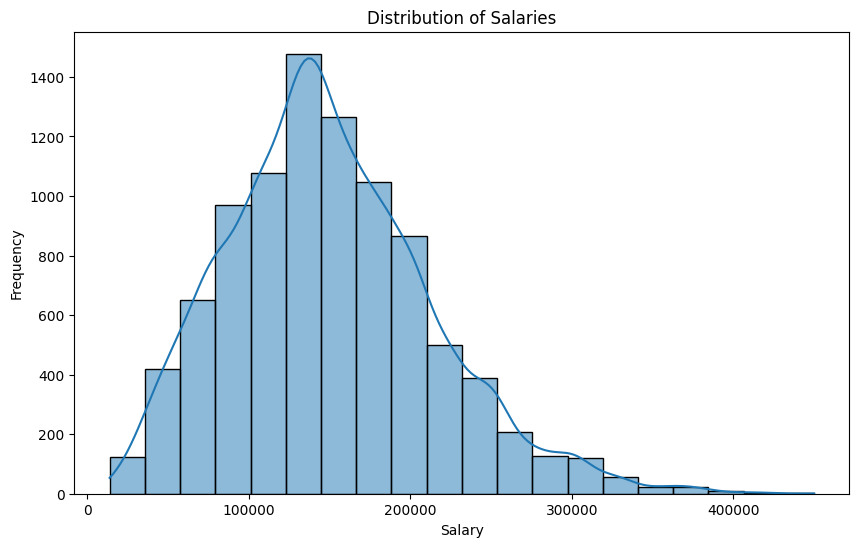

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(df['salary'], bins=20, kde=True)
plt.title('Distribution of Salaries')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

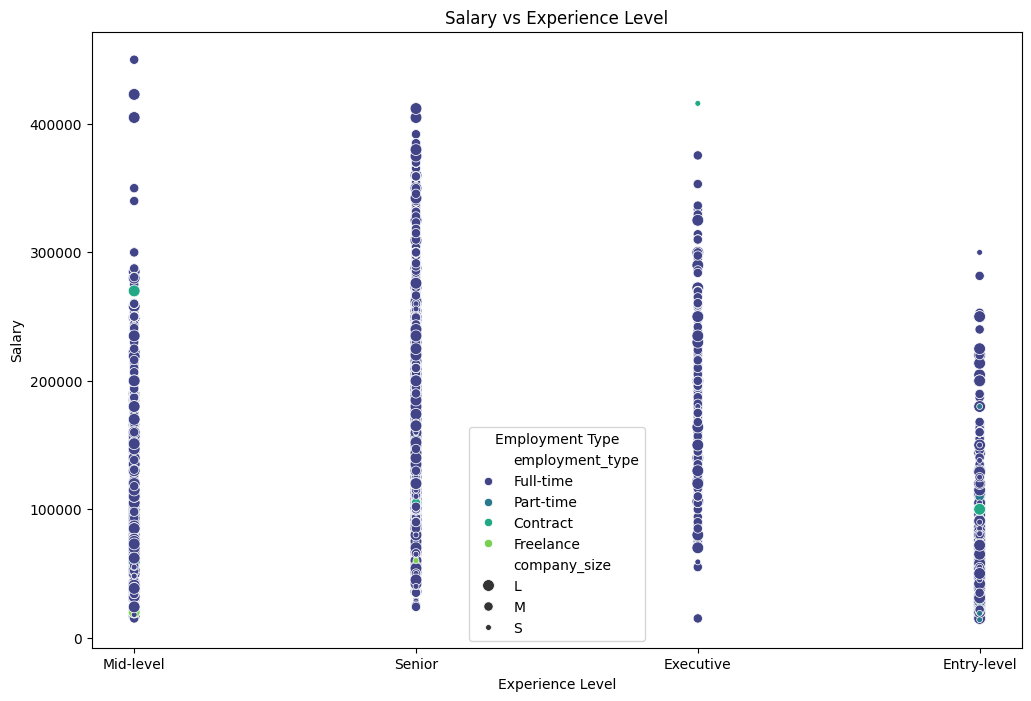

In [8]:
# Assuming 'experience_level' is a column containing the experience level of employees
# Let's create a scatter plot to analyze the relationship between experience level and salary

# Scatter plot for Salary vs Experience Level
plt.figure(figsize=(12, 8))
sns.scatterplot(x='experience_level', y='salary', data=df, hue='employment_type', palette='viridis', size='company_size')
plt.title('Salary vs Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary')
plt.legend(title='Employment Type')
plt.show()


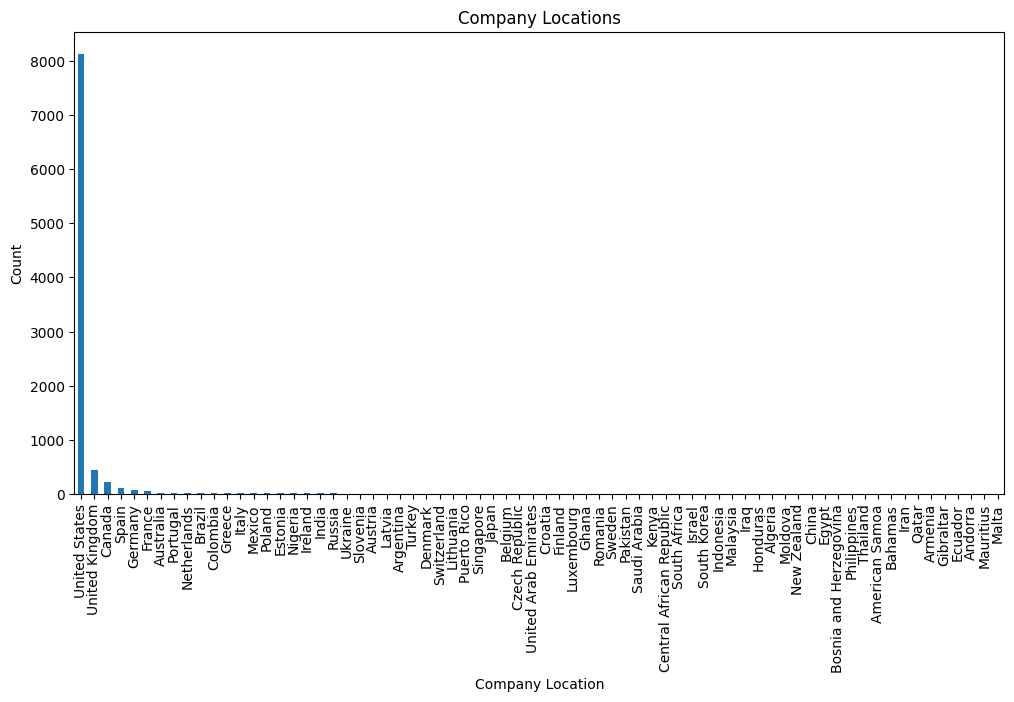

In [12]:
# Location Analysis
location_count = df['company_location'].value_counts()
plt.figure(figsize=(12, 6))
location_count.plot(kind='bar', title='Company Locations')
plt.xlabel('Company Location')
plt.ylabel('Count')
plt.show()


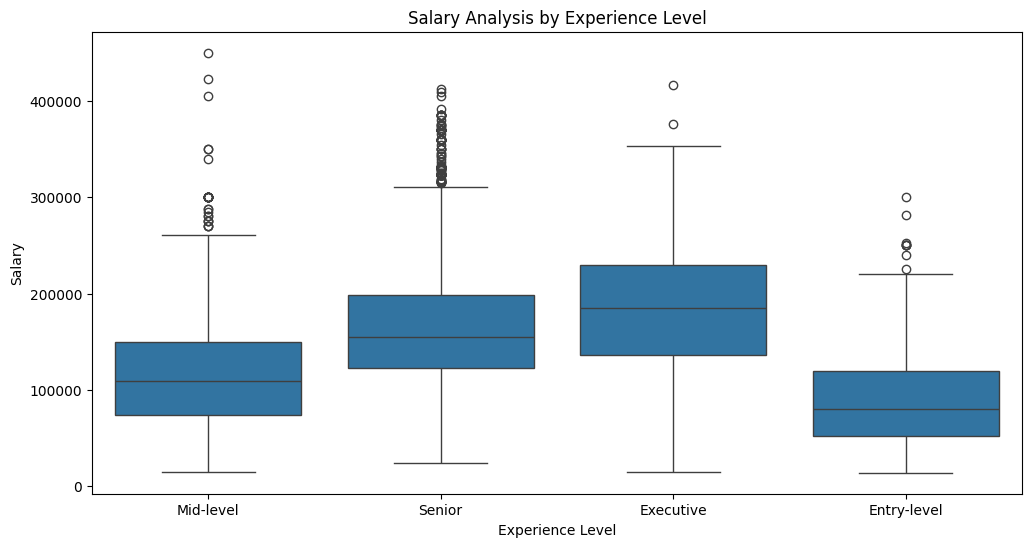

In [13]:
# Salary Analysis by Experience Level
plt.figure(figsize=(12, 6))
sns.boxplot(x='experience_level', y='salary', data=df)
plt.title('Salary Analysis by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary')
plt.show()

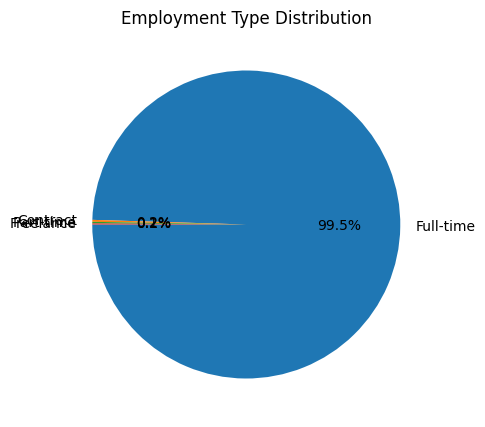

In [22]:
# Employment Type Analysis
employment_type_count = df['employment_type'].value_counts()
plt.figure(figsize=(10, 5))
employment_type_count.plot(kind='pie', autopct='%1.1f%%', startangle=180, title='Employment Type Distribution')
plt.ylabel('')
plt.show()

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import joblib
from flask import Flask, request, jsonify

In [28]:
# Assume the target variable is 'salary' and features are other relevant columns
X = df[['work_year', 'job_category', 'experience_level']]
y = df['salary']

# Convert categorical variables to dummy/indicator variables
X = pd.get_dummies(X, columns=['work_year', 'job_category', 'experience_level'], drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
# Create and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 3195929205.966956


In [30]:
# Save the trained model to a file (e.g., 'salary_prediction_model.pkl')
model_filename = 'salary_prediction_model.pkl'
joblib.dump(model, model_filename)


['salary_prediction_model.pkl']